# Train Whale Detection

In [13]:
import os
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.model_selection import train_test_split

#Classes
from utils import RoboflowHelper
#Functions
from utils import calculate_bounding_box, crop_image

## Read Data

In [2]:
# Path to the image directory and CSV file
image_dir = "./data/imgs"
csv_file = "./data/train.csv"

# Reading the CSV file using Pandas
data = pd.read_csv(csv_file)

In [3]:
data.head()

,Image,whaleID
0,w_7812.jpg,whale_48813
1,w_4598.jpg,whale_09913
2,w_3828.jpg,whale_45062
3,w_8734.jpg,whale_74162
4,w_3251.jpg,whale_99558


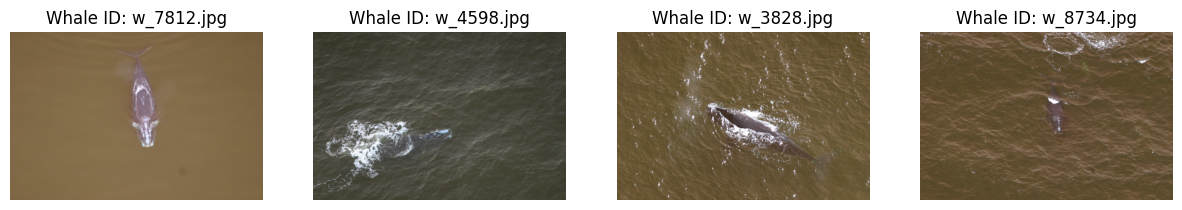

In [4]:
# Display the first four images
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for i in range(4):
    image_name = data['Image'].values[i]
    image_path = os.path.join(image_dir, image_name)
    if os.path.exists(image_path):
        img = cv2.imread(image_path)
        axes[i].imshow(img)
        axes[i].set_title(f"Whale ID: {image_name}")
        axes[i].axis('off')

plt.show()

## Import pretrained YOLOv5 Model

In [5]:
rfh = RoboflowHelper()

loading Roboflow workspace...
loading Roboflow project...


### Display Boundingboxes

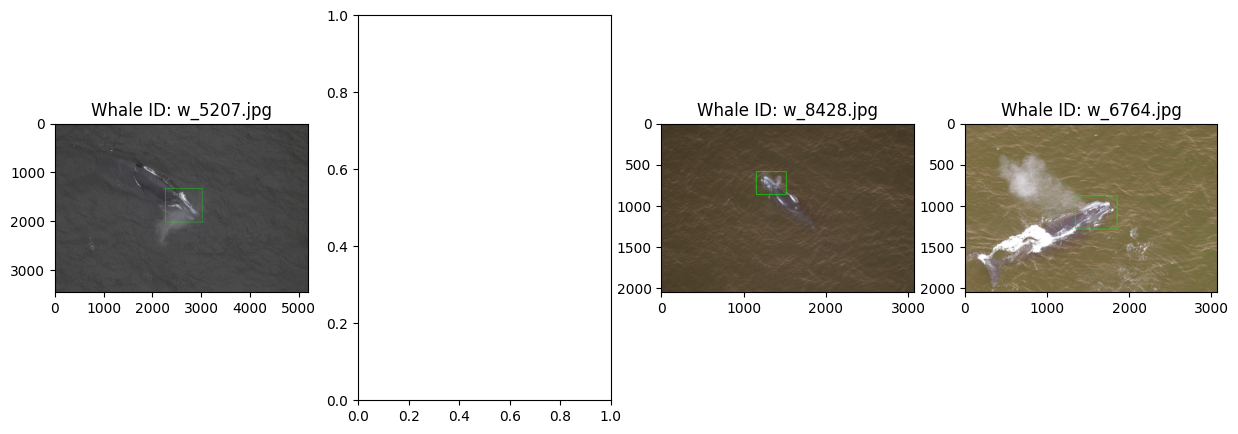

In [6]:
# Display the first four images
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for i in range(4):
    # visualize your prediction
    index = 300 + i
    image_name = data['Image'].values[index]
    image_path = os.path.join(image_dir, data['Image'][index])
    prediction = rfh.get_prediction(image_path)
    if prediction:
        image = cv2.imread(image_path)
        start_point, end_point = calculate_bounding_box(prediction['x'], prediction['y'], prediction['width'], prediction['height'])
        cv2.rectangle(image, start_point, end_point, color=(0,255,0), thickness=6)
        axes[i].imshow(image)
        axes[i].set_title(f"Whale ID: {image_name}")

plt.show()

## Prepare Cropped Testdata

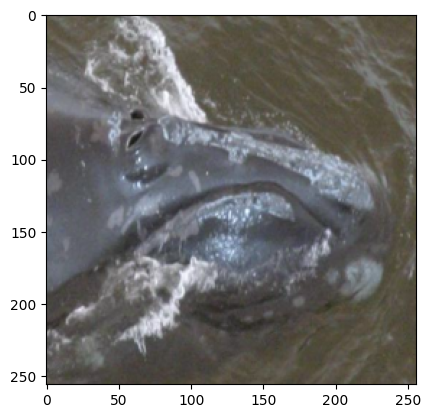

In [11]:
# Crop and rescale images
# visualize your prediction
image_path = os.path.join(image_dir, data['Image'][600])

prediction = rfh.get_prediction(image_path)
if prediction:
    image = cv2.imread(image_path)
    start_point, end_point = calculate_bounding_box(prediction['x'], prediction['y'], prediction['width'], prediction['height'])
    cropped = crop_image(image, start_point, end_point)
    resized = cv2.resize(cropped, (256,256), interpolation = cv2.INTER_AREA)
    plt.imshow(resized)

In [10]:
# to not accidentally run the following code
throw Exception

SyntaxError: invalid syntax (2104500626.py, line 2)

In [ ]:
write_path = "./data/cropped"

def img_pred_rescale_write(image_name):
    image_path = os.path.join(image_dir, image_name)
    image = cv2.imread(image_path)
    if os.path.exists(image_path):
        prediction = rfh.get_prediction(image_path)
            if prediction:
                start_point, end_point = calculate_bounding_box(prediction['x'], prediction['y'], prediction['width'], prediction['height'])
                cropped = crop_image(image, start_point, end_point)
                resized = cv2.resize(cropped, (256,256), interpolation = cv2.INTER_AREA)
                cv2.imwrite(os.path.join(write_path, image_name), resized)

In [ ]:
for _, row in data.iterrows():
    img_pred_rescale_write(row['Image'])

## Prepare Datasets

In [ ]:
# Build a whale id lookup dict with the respective probability tensors
n = data['whaleID'].nunique()

whale_id_dict = {}

for idx, whale_id in enumerate(sorted(data['whaleID'].unique())):
    tensor = torch.zeros(n)
    tensor[idx] = 1
    whale_id_dict[whale_id] = tensor

def get_y_tensor(whale_id):
    return whale_id_dict[whale_id]

## X TODO

In [ ]:
X = []
y = []

for _, row in data.iterrows():
    X.append(img_pred_rescale(row['Image']))
    y.append(get_y_tensor(row['whaleID']))

# Convert the lists to numpy arrays
X = np.array(X) # 256x256 whale heads
y = np.array(y) # Corresponding whale id tensors

# Display the shape of the data
print(f"Shape of X: {X.shape}")
print(f"Shape of X[0]: {X[0].shape}")
print(f"Shape of y: {y.shape}")
print(f"Shape of y[0]: {y[0].shape}")

In [ ]:
print("Test")